1. Загрузить файл hr.csv
2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)
3. Рассчитать и визуализировать корреляционную матрицу для переменных
4. Визуализировать несколько взаимосвязей между переменными
5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными
6. Рассчитать сколько работников работает в каждом департаменте
7. Показать распределение сотрудников по зарплатам
8. Показать распределение сотрудников по зарплатам совместно с департаментами
9. Сколько сотрудников покинули компанию
10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию
11. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте

In [1]:
import pandas as pd
import statistics as st
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale=1.5)
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew

In [2]:
hr = pd.read_csv('HR.csv')

In [3]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
hr.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [7]:
hr.mode().loc[0]

satisfaction_level         0.1
last_evaluation           0.55
number_project               4
average_montly_hours       135
time_spend_company           3
Work_accident                0
left                         0
promotion_last_5years        0
sales                    sales
salary                     low
Name: 0, dtype: object

In [8]:
corr = hr.corr()

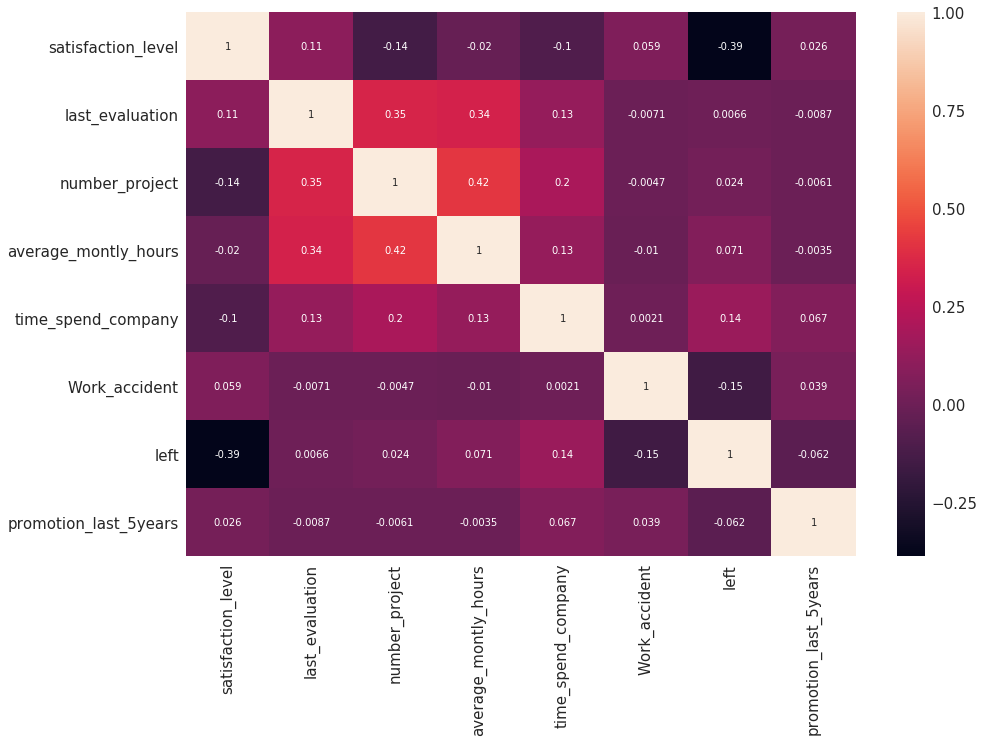

In [9]:
plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

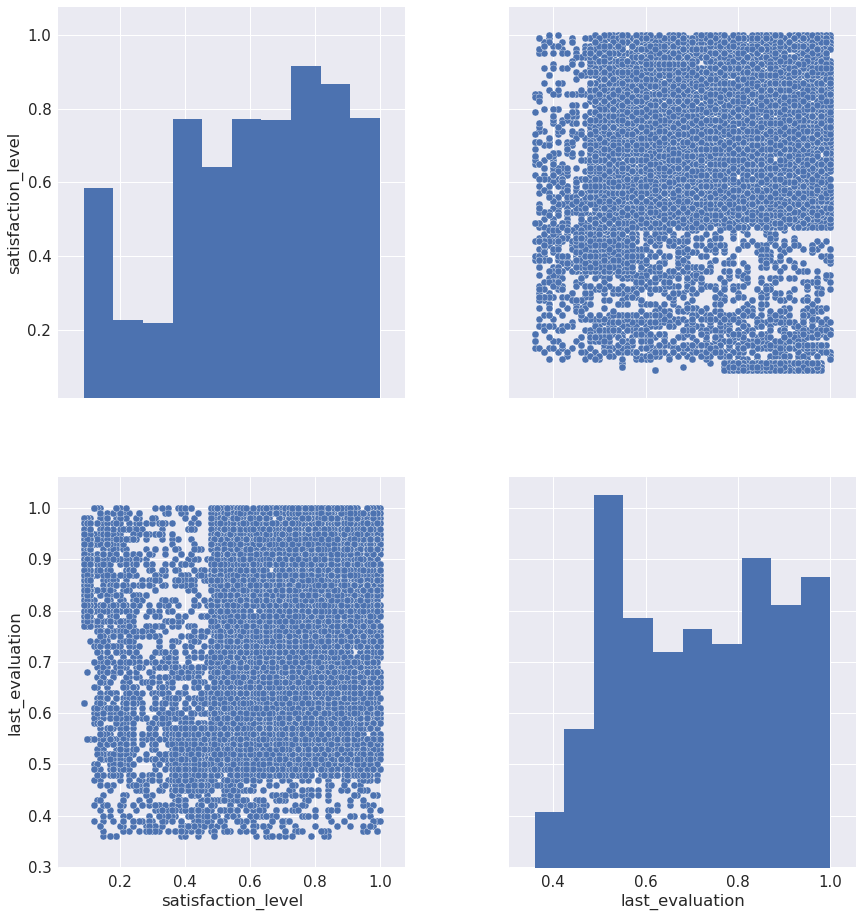

In [10]:
g = sns.pairplot(hr, vars=['satisfaction_level', 'last_evaluation'],
                 kind='scatter')
g.fig.set_size_inches(15,15)

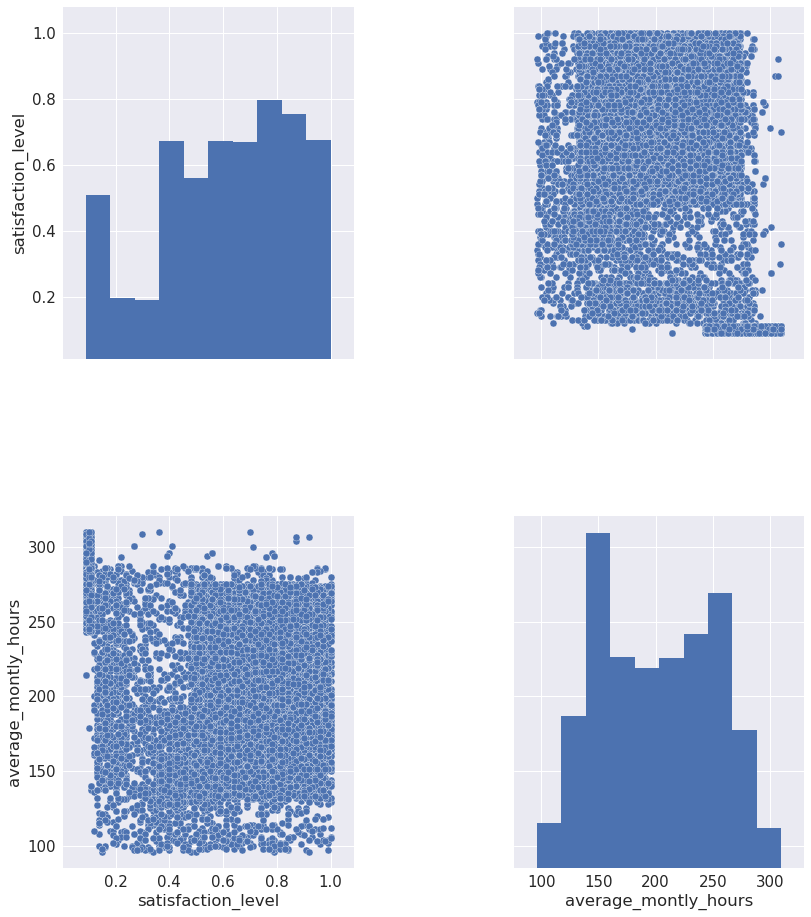

In [11]:
g = sns.pairplot(hr, vars=['satisfaction_level', 'average_montly_hours'],
                 kind='scatter')
g.fig.set_size_inches(15,15)

In [12]:
sales = hr[hr['sales']=='sales']
marketing = hr[hr['sales']=='marketing']
management = hr[hr['sales']=='management']
IT = hr[hr['sales']=='IT']

In [13]:
stats.ttest_ind(sales['average_montly_hours'], marketing['average_montly_hours']) 

Ttest_indResult(statistic=0.8212001474299715, pvalue=0.41157145594534483)

In [14]:
stats.ttest_ind(sales['average_montly_hours'], management['average_montly_hours']) 

Ttest_indResult(statistic=-0.16031777143129528, pvalue=0.8726375516747543)

In [15]:
stats.ttest_ind(management['satisfaction_level'], IT['satisfaction_level']) 

Ttest_indResult(statistic=0.2697230314368249, pvalue=0.7874033407158763)

In [16]:
stats.ttest_ind(sales['satisfaction_level'], marketing['satisfaction_level'])

Ttest_indResult(statistic=-0.4443819266830463, pvalue=0.6567857260510299)

In [17]:
hr['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [18]:
hr['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

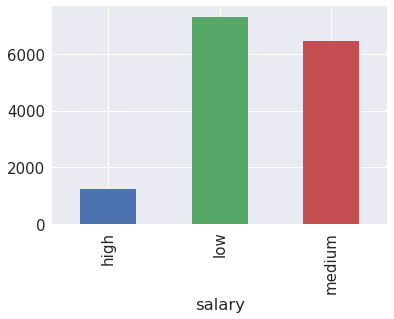

In [19]:
hr.groupby('salary').count()['sales'].plot(kind='bar')

In [20]:
salary = hr.groupby(['sales', 'salary']).count()['satisfaction_level'].reset_index()
hr_salary = salary.pivot_table(
                        index='sales', 
                        columns='salary', 
                        values='satisfaction_level', 
                        aggfunc=sum).fillna(0).applymap(float)

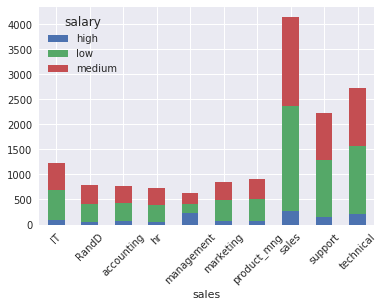

In [21]:
sns.set(font_scale=1)
g = hr_salary.plot(kind='bar', rot=45, stacked=True)

In [22]:
hr['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

Компанию покинул 3571 сотрудник. Гипотеза номер 1. Компанию покидают сотрудники с низкой зарплатой.

In [23]:
left = hr.groupby(['left', 'salary']).count()['satisfaction_level'].reset_index()
left = left.pivot_table(
                        index='left', 
                        columns='salary', 
                        values='satisfaction_level', 
                        aggfunc=sum).fillna(0).applymap(float)
left

salary,high,low,medium
left,,,
0,1155.0,5144.0,5129.0
1,82.0,2172.0,1317.0


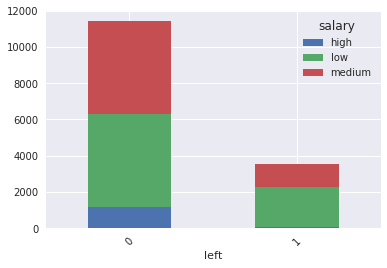

In [24]:
sns.set(font_scale=1)
g = left.plot(kind='bar', rot=45, stacked=True)

Из 3571 сотрудников - 2172 покинуло компанию из-за низкой зарплаты.

In [25]:
left = hr[hr['left']==1]

In [26]:
l = left.groupby('satisfaction_level').count().reset_index()
l = l[['satisfaction_level', 'salary']].sort_values('salary', ascending=False)

In [27]:
def level_satisfaction(row):
    if row['satisfaction_level'] < 0.25:
        res = '<0.25'
    elif row['satisfaction_level'] < 0.5:
        res = 'from 0.25 to 0.5'
    elif row['satisfaction_level'] < 0.75:
        res = 'from 0.5 to 0.75'
    else:
        res = 'from 0.75 to 1'
    return res      

In [28]:
l['level_satisfaction'] = l.apply(level_satisfaction, axis=1)  

In [29]:
l = l.groupby('level_satisfaction')['salary'].sum()
l

level_satisfaction
<0.25                931
from 0.25 to 0.5    1616
from 0.5 to 0.75     218
from 0.75 to 1       806
Name: salary, dtype: int64

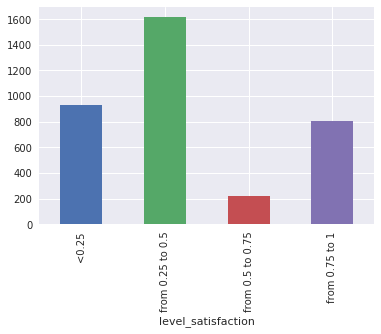

In [30]:
l.plot(kind='bar')

Из 3571 сотрудников 2547 покинуло компанию из-за уровня удовлетворенности ниже 50%

In [31]:
left['promotion_last_5years'].value_counts()

0    3552
1      19
Name: promotion_last_5years, dtype: int64

Из 3571 сотрудников только 19 получили повышение за последние 5 лет

In [32]:
not_left =  hr[hr['left']==0]

In [33]:
left['average_montly_hours'].mean()

207.41921030523662

In [34]:
not_left['average_montly_hours'].mean() 

199.0602030101505

In [35]:
left['average_montly_hours'].median()

224.0

In [36]:
not_left['average_montly_hours'].median() 

198.0

In [37]:
left['average_montly_hours'].mode()

0    135
dtype: int64

In [38]:
not_left['average_montly_hours'].mode()

0    224
dtype: int64

In [39]:
stats.ttest_ind(left['average_montly_hours'], not_left['average_montly_hours']) 

Ttest_indResult(statistic=8.752254731850009, pvalue=2.3113035567540143e-18)

Тест о равенстве средних подтверждает что в группе сотрудников покинувших компанию среднее число рабочих часов в месяц - выше

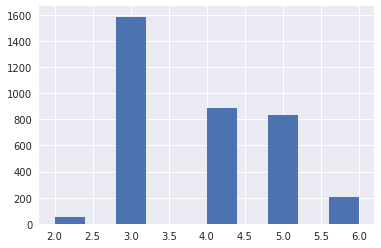

In [40]:
left['time_spend_company'].hist()

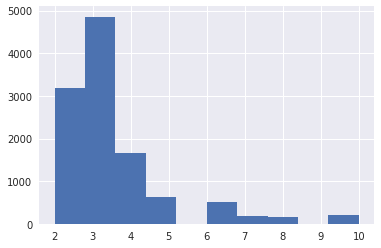

In [41]:
not_left['time_spend_company'].hist()

Распределение сотрудников покинувших компанию смещено в сторону сотрудников больше времени проработавших в компании

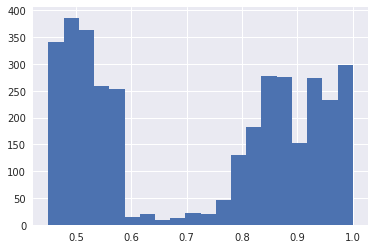

In [42]:
left['last_evaluation'].hist(bins=20)

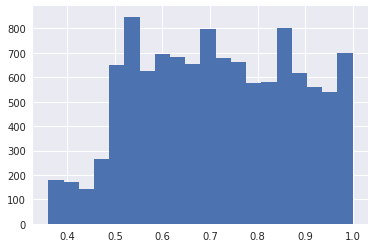

In [43]:
not_left['last_evaluation'].hist(bins = 20)

Распределение последней аттестации (оценки) сотрудников покинувших компанию разделено на 2 группы: сотрудники с оценкой ниже 0.6 и сотрудники с оценкой выше 0.8

In [44]:
left = hr.groupby(['left', 'Work_accident']).sum()['satisfaction_level'].reset_index()
left = left.pivot_table(
                        index='left', 
                        columns='Work_accident', 
                        values='satisfaction_level', 
                        aggfunc=sum).fillna(0).applymap(float)
left

Work_accident,0,1
left,,
0,6289.63,1330.67
1,1496.04,75.55


In [45]:
Из-за несчастных случаев компанию сотрудники не покидают

SyntaxError: invalid syntax (<ipython-input-45-e0d754469b43>, line 1)

In [46]:
left = hr.groupby(['left', 'sales']).count()['satisfaction_level'].reset_index()
left = left.pivot_table(
                        index='sales', 
                        columns='left', 
                        values='satisfaction_level', 
                        aggfunc=sum).fillna(0).applymap(float)
left

left,0,1
sales,,
IT,954.0,273.0
RandD,666.0,121.0
accounting,563.0,204.0
hr,524.0,215.0
management,539.0,91.0
marketing,655.0,203.0
product_mng,704.0,198.0
sales,3126.0,1014.0
support,1674.0,555.0


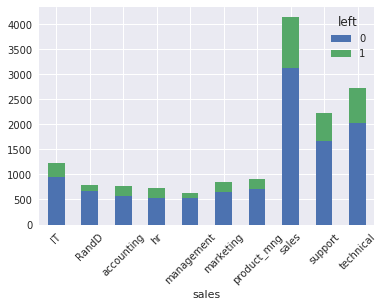

In [47]:
sns.set(font_scale=1)
g = left.plot(kind='bar', rot=45, stacked=True)

In [48]:
l = left.reset_index()
l

left,sales,0,1
0,IT,954.0,273.0
1,RandD,666.0,121.0
2,accounting,563.0,204.0
3,hr,524.0,215.0
4,management,539.0,91.0
5,marketing,655.0,203.0
6,product_mng,704.0,198.0
7,sales,3126.0,1014.0
8,support,1674.0,555.0
9,technical,2023.0,697.0


In [49]:
l['share_of_left'] = l[1]/(l[0]+l[1])

In [50]:
l.sort_values('share_of_left', ascending = False)

left,sales,0,1,share_of_left
3,hr,524.0,215.0,0.290934
2,accounting,563.0,204.0,0.265971
9,technical,2023.0,697.0,0.256250
8,support,1674.0,555.0,0.248991
7,sales,3126.0,1014.0,0.244928
5,marketing,655.0,203.0,0.236597
0,IT,954.0,273.0,0.222494
6,product_mng,704.0,198.0,0.219512
1,RandD,666.0,121.0,0.153748
4,management,539.0,91.0,0.144444


Наибольшая доля покинувших в департаментах: hr, accounting, technical, support, sales